In [1]:
library(DESeq2)
library(ggplot2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

In [2]:
options(repr.matrix.max.cols=100, repr.matrix.max.rows=100)

# Import hDel-v1 & hDel-v2 sgRNA counts from Pt5-C and C3624K

In [3]:
hdel_v1 <- read.csv('~/Documents/hDels/hDel-v1_DESeq2_α-RRA/hDel-v1_sgRNA_counts.txt', header = TRUE, sep = "\t", row.names=1)
hdel_v1

,hDel_ID_gene_symbol,t0_3624K,rep1_3624K,rep2_3624K,t0_Pt5C,rep1_Pt5C,rep2_Pt5C
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
hDel_5630:39,hDel_5630,1126,1330,1194,1445,1350,1099
hDel_1025:124,hDel_1025,2731,2314,2840,2962,2532,2948
hDel_919:1,hDel_919,1103,913,1332,1134,997,772
hDel_3747:21,hDel_3747,2422,2031,2721,2307,1206,1721
hDel_1243:42,hDel_1243,494,710,591,599,1190,580
hDel_4523:29,hDel_4523,1666,1644,1801,2417,2571,1599
hDel_6258:1,hDel_6258,2138,1489,2147,2202,2720,2172
hDel_5810:57,hDel_5810,1418,1178,2271,1760,2065,2420
hDel_7096:407,hDel_7096,2304,2317,2625,2255,2725,3322


In [4]:
hdel_v2 <- read.csv('/2TBevo/hDel-v2_C3624K_FASTQs/TFAP08-P_3lanes/hDel-v2_C3624K.count.txt', header = TRUE, sep = "\t", row.names=1)
hdel_v2

,Gene,t0_C3624K,rep1_C3624K,rep2_C3624K
,<chr>,<int>,<int>,<int>
hDel_2369:185,hDel_2369,7856,5123,6558
hDel_6304:116,hDel_6304,4273,4027,5077
hDel_5650:45,hDel_5650,4008,4333,6458
hDel_4603:130,hDel_4603,4083,3254,3498
hDel_1003:84,hDel_1003,2722,1971,3562
hDel_6833:54,hDel_6833,6841,7705,6954
hDel_1062:84,hDel_1062,2901,2101,2990
hDel_4720:158,hDel_4720,4371,2952,4379
hDel_3090:138,hDel_3090,4083,4331,3648


# hDel-v1 & hDel-v2 counts & metadata

In [5]:
counts_v1 <- hdel_v1[, 2:ncol(hdel_v1)]

metaData_v1 <- data.frame(cell_line = sapply(colnames(counts_v1), function(x) unlist(strsplit(toString(x), split = "_", fixed = TRUE))[2]), 
                       time_point = rep(c('t0','tfinal','tfinal'), times=2))
metaData_v1

,cell_line,time_point
,<chr>,<chr>
t0_3624K,3624K,t0
rep1_3624K,3624K,tfinal
rep2_3624K,3624K,tfinal
t0_Pt5C,Pt5C,t0
rep1_Pt5C,Pt5C,tfinal
rep2_Pt5C,Pt5C,tfinal


In [6]:
counts_v2 <- hdel_v2[, 2:ncol(hdel_v2)]

metaData_v2 <- data.frame(cell_line = sapply(colnames(counts_v2), function(x) unlist(strsplit(toString(x), split = "_", fixed = TRUE))[2]), 
                       time_point = rep(c('t0','tfinal','tfinal'), times=1))
metaData_v2

,cell_line,time_point
,<chr>,<chr>
t0_C3624K,C3624K,t0
rep1_C3624K,C3624K,tfinal
rep2_C3624K,C3624K,tfinal


# hDel-v1 DESeq2, joint analysis of C3624K and Pt5-C

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates: 34 workers

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates, fitting model and testing: 34 workers



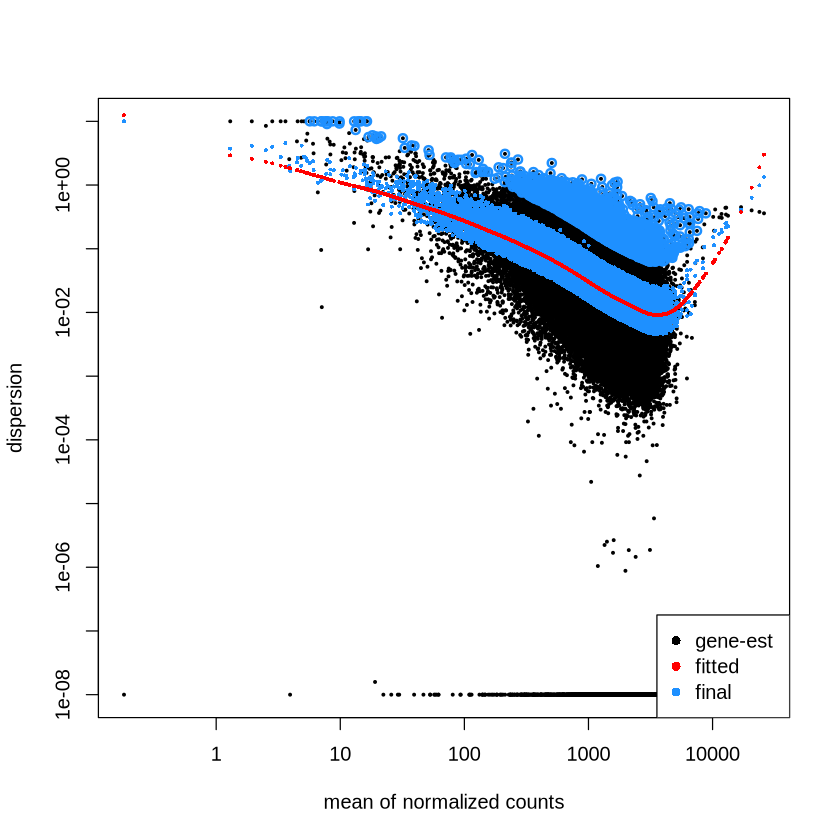

In [7]:
deseq_hdelv1 <- DESeq2::DESeqDataSetFromMatrix(countData = counts_v1, 
                                               colData = metaData_v1, 
                                               design = ~ cell_line + time_point)

deseq_hdelv1 <- DESeq2::DESeq(deseq_hdelv1, parallel=TRUE)
plotDispEsts(deseq_hdelv1)

In [8]:
deseq_hdelv1_results <- data.frame(DESeq2::results(deseq_hdelv1))
write.csv(deseq_hdelv1_results,'~/Documents/hDels/hDel-v1_DESeq2_α-RRA/hDel-v1_DESeq2.csv', row.names = TRUE)
deseq_hdelv1_results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hDel_5630:39,1254.6341,-0.073248562,0.17808758,-0.41130641,6.808479e-01,9.333931e-01
hDel_1025:124,2716.1677,-0.131932406,0.12798933,-1.03080782,3.026310e-01,7.597641e-01
hDel_919:1,1041.2884,-0.210085063,0.20563230,-1.02165400,3.069447e-01,7.629539e-01
hDel_3747:21,2082.6758,-0.382381034,0.20272550,-1.88620092,5.926788e-02,3.929587e-01
hDel_1243:42,686.3405,0.441882358,0.31416858,1.40651351,1.595717e-01,6.134751e-01
hDel_4523:29,1930.6781,-0.122934014,0.17832168,-0.68939468,4.905749e-01,8.654968e-01
hDel_6258:1,2127.8698,-0.087869886,0.17229534,-0.50999571,6.100545e-01,9.116837e-01
hDel_5810:57,1832.0756,0.274173319,0.22078705,1.24179983,2.143104e-01,6.826884e-01
hDel_7096:407,2583.4066,0.225570169,0.15279700,1.47627354,1.398705e-01,5.822412e-01


# hDel-v2 DESeq2, analysis of C3624K

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates: 34 workers

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates, fitting model and testing: 34 workers



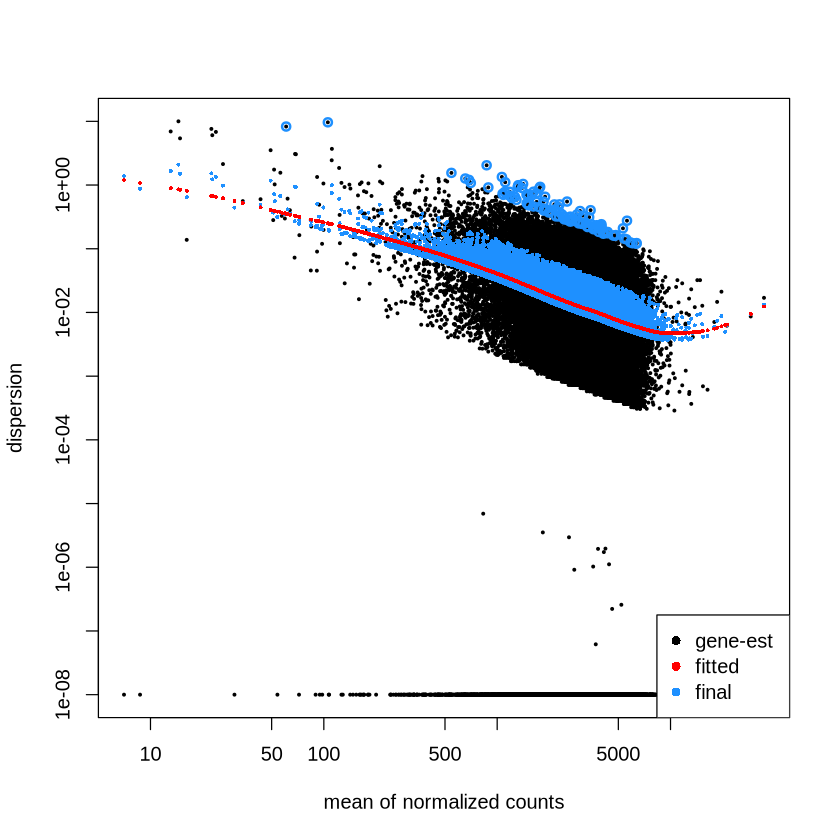

In [9]:
deseq_hdelv2 <- DESeq2::DESeqDataSetFromMatrix(countData = counts_v2, 
                                               colData = metaData_v2, 
                                               design = ~time_point)

deseq_hdelv2 <- DESeq2::DESeq(deseq_hdelv2, parallel=TRUE)
plotDispEsts(deseq_hdelv2)

In [10]:
deseq_hdelv2_results <- data.frame(DESeq2::results(deseq_hdelv2))
write.csv(deseq_hdelv2_results,"~/Documents/hDels/hDel-v2-α-RRA/hDel-v2_DESeq2.csv", row.names = TRUE)
deseq_hdelv2_results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hDel_2369:185,6491.3366,-0.447299580,0.1403580,-3.18684699,1.438328e-03,3.014591e-02
hDel_6304:116,4440.9947,0.072312180,0.1588073,0.45534536,6.488608e-01,8.829066e-01
hDel_5650:45,4891.8041,0.402639562,0.1995114,2.01812856,4.357787e-02,2.755834e-01
hDel_4603:130,3610.8199,-0.286370704,0.1646262,-1.73952097,8.194317e-02,3.818610e-01
hDel_1003:84,2721.3272,-0.010952703,0.2964640,-0.03694446,9.705293e-01,9.918050e-01
hDel_6833:54,7187.8420,0.095159740,0.1662753,0.57230234,5.671172e-01,8.469335e-01
hDel_1062:84,2648.5647,-0.212760133,0.2267922,-0.93812826,3.481785e-01,7.145353e-01
hDel_4720:158,3875.7380,-0.279934401,0.2123597,-1.31820843,1.874339e-01,5.597477e-01
hDel_3090:138,4038.4263,-0.034779510,0.2173559,-0.16001181,8.728718e-01,9.643938e-01
